# EDA OF KAGGLE HOUSE PRICES

### Check everything for nulls, bad values, inconsistent variables, plan preprocessing handling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
houses_raw = pd.read_csv('train.csv')
houses_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 80 Columns

houses_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
houses_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Dupe check -- no dupes

houses_raw.duplicated().sum()

np.int64(0)

In [7]:
houses_clean = houses_raw.copy()

## 0 - ID

* All unique values
* 0 nulls
* Row identifier - each row is a house
* Updating this colums to index

In [8]:
# Check for dupes in ID Columns -- none

houses_clean['Id'].duplicated().sum()

np.int64(0)

In [9]:
houses_clean = houses_clean.set_index('Id')

In [10]:
houses_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1 -  MSSubClass

* Each number represents a dwelling type
* 0 nulls
* Nominal
* Convert to str - originally int, column is truly nominal

In [11]:
houses_clean['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [12]:
houses_clean['MSSubClass'] = houses_clean['MSSubClass'].astype(str)

In [13]:
houses_clean['MSSubClass'].dtype

dtype('O')

## 2 - MSZoning

* Identifies the general zoning classification of the sale
* 0 nulls
* Nominal

In [16]:
houses_clean['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

## 3 - LotFrontage
* Feet of street connected to property
* 259 nulls
* Numeric

Lot frontage is the measure of how many feet of the property faces a public road. 259 nulls is 17.74% of the total, which would be a high number to remove due to the size of the dataset. Generally most homes will have some type of frontage unless they are "landlocked" completely, and frontage itself has a slight positive correlation to price.

No clear reason for missing values after analysis below. Will impute values during preprocess -- 0 frontage is unlikely and there is a correlation to target


In [17]:
# What % missing

houses_clean['LotFrontage'].isna().sum() / houses_clean.shape[0]

np.float64(0.1773972602739726)

<Axes: >

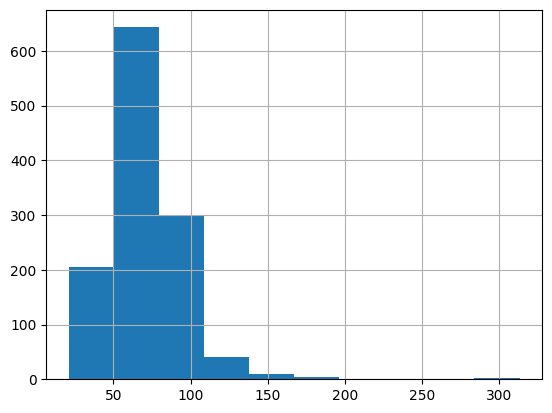

In [18]:
houses_clean['LotFrontage'].hist()

In [19]:
# Check min values -- 0 doesn't exist

houses_clean['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
# Create correlatin matrix

corr_mat = houses_clean.select_dtypes(include='number').corr()

# Check Lot Frontage correlation to every other numerical column
lotfrontage_corr = corr_mat['LotFrontage']

#Frontage is too highly correlated to target to simply drop 17% of the data in small dataset

lotfrontage_corr.abs().sort_values(ascending=False)


LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
OverallCond      0.059213
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
BsmtHalfBath     0.007234
KitchenAbvGr     0.006069
MiscVal          0.003368
Name: LotFrontage, dtype: float64

In [21]:
# No frontage could be due to home off the grid. Compare to driveway type (i.e unpaved driveway could be out in country with 0 frontage )

frontagecheck = houses_clean[['PavedDrive', 'LotFrontage']]

# Fill filtered NAs with 0 so plot can be made

frontagecheck['LotFrontage'] = frontagecheck['LotFrontage'].fillna(0)


C:\Users\nick_\AppData\Local\Temp\ipykernel_19676\3503824539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontagecheck['LotFrontage'] = frontagecheck['LotFrontage'].fillna(0)


In [22]:
#Check that NA fill worked

frontagecheck['LotFrontage'].isna().sum()


np.int64(0)

In [23]:
# Filter frontage to only show 0 values -- 0 surrogate for NA

frontagecheck = frontagecheck[frontagecheck['LotFrontage'] == 0]

In [24]:
# Double check that frontage only shows former NA columns

frontagecheck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 8 to 1447
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PavedDrive   259 non-null    object 
 1   LotFrontage  259 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


<Axes: xlabel='PavedDrive', ylabel='count'>

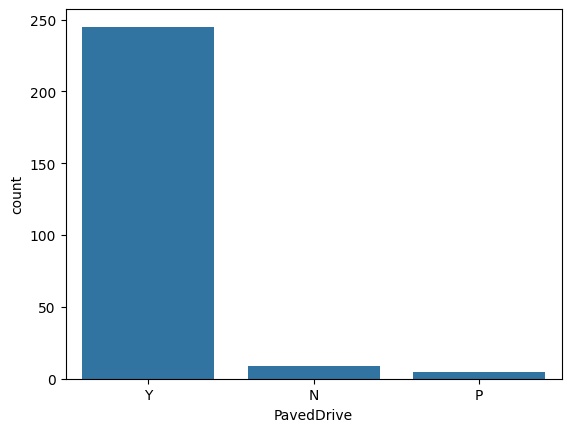

In [25]:
# Plot which drveway types are in the null values in frontage

sns.countplot(x='PavedDrive', data=frontagecheck)

# Large majority of frontage nulls are paved driveway, invalidating non-suburb theory. Impute values in preprocessing rather than 0

## 4 - LotArea
* Lot size in sq ft
* No nulls
* Numeric

No changes to column

<Axes: >

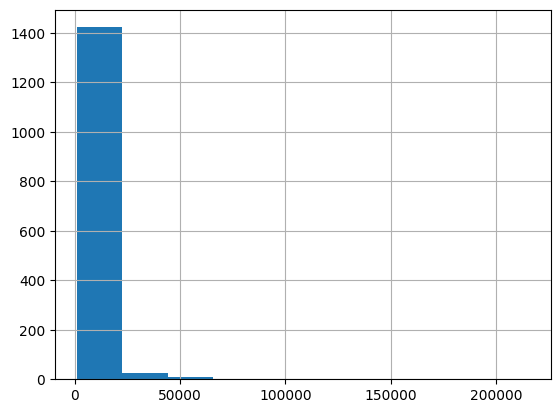

In [26]:
houses_clean['LotArea'].hist()

In [27]:
# Histogram seems to have outliers, describe check

houses_clean['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [28]:
# # Find outliers are, using 4 std dev as conservative measure

# lotarea_mean = houses_clean['LotArea'].mean()
# lotarea_sd = houses_clean['LotArea'].std()

# out_calc = (houses_clean['LotArea'] - lotarea_mean).abs() >= 4 * lotarea_sd

# outliers = houses_clean[out_calc]

# outliers


In [29]:
# # Check % of outliers before dropping

# outliers.shape[0] / houses_clean.shape[0]

In [30]:
# # Remove outliers

# houses_clean = houses_clean[~out_calc]

# Check for removal

houses_clean.info()

# 10 rows removed from dataset

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 5 - Street

* Type of road access to property
* 0 nulls
* Nominal

In [31]:
houses_clean['Street'].value_counts()


Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [32]:
# # Only 5 of 1454 are gravel, remove gravel as number is invariant

# houses_clean = houses_clean[houses_clean['Street'] == 'Pave']

In [33]:
# # Check for correct removal

# houses_clean[houses_clean['Street'] == 'Grvl'].sum().sum()


## 6 - Alley

* Type of alley access to property
* 1352 nulls
* Nominal

Data dictionary lists NA value as "no alley". Converted all NaaNs to string NA

In [34]:
# NA means there is no alley next to house according to data dictionary and this is majority of items
# make sure NA "No Alley" value is not registering as NaaN

houses_clean['Alley'].value_counts(dropna=False)


Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [35]:
# Change naans to string "NA"

# houses_clean['Alley'] = houses_clean['Alley'].fillna('NA')

# Check that code above worked

houses_clean['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

## 7 - LotShape

* General shape of property
* No nulls
* Nominal

In [36]:
houses_clean['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [37]:
# # Only 8 items in IR3 which is invariant. Combine with IR2 which is next category up

# houses_clean['LotShape'] = houses_clean['LotShape'].replace('IR3', 'IR2')


In [38]:
# Check that item above worked correctly

houses_clean['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

## 8 - LandContour

* Flatness of land
* 0 nulls
* Nominal
* No changes to column

In [39]:
houses_clean['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

## 9 - Utilities      

* Utility Type
* 0 nulls
* All but one value is the same, keeping all values

In [40]:
houses_clean['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [41]:
# # Remove single row with "NoSeWa"

# houses_clean = houses_clean[houses_clean['Utilities'] != 'NoSeWa']

In [42]:
# #Check work

# houses_clean['Utilities'].value_counts()

## 10 - LotConfig

* Lot configuration/layout
* 0 nulls
* Nominal
* FR2 (47 rows) and FR3 (4 rows) are multiple frotage properties, combining into one category as "MulFront" as the other categories are single frontage

In [43]:
houses_clean['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [44]:
# # Only four FR3, combone with FR2 and relabel "MulFront" for multi frontage to preserve data

# houses_clean['LotConfig'] = houses_clean['LotConfig'].replace(['FR2', 'FR3'], 'MulFront')

In [45]:
houses_clean['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

## 11 - LandSlope


* Slope of property
* 0 nulls
* Nominal
* All three categories assume some sort of sloped, aka nothing considered flat
* Average sale price rises from gentle slope to moderate, then drops for severe
* Severe has a larger standard deviation than moderate or gentle
* Only 8 "severe" slope property, combining with "Moderate" rather than deleting severe, for the sake of data preservation
* New categories are Gentle (no change from before, same numbers) and "Not GEntle" (combined Moderate and Severe)

In [46]:
houses_clean['LandSlope'].value_counts()

# Only 8 "severe" slope types in entire dataset

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

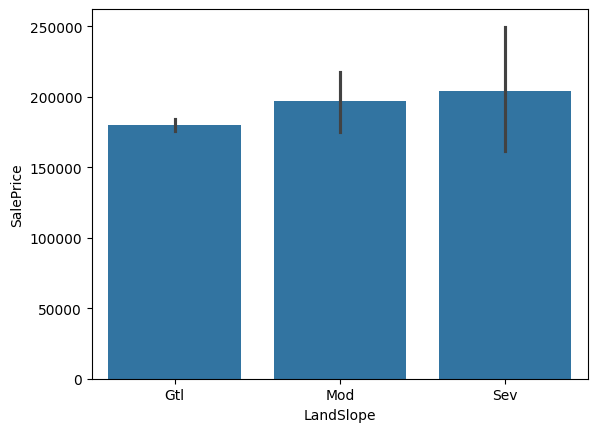

In [47]:
# Look at difference in average sale price based on slope type

sns.barplot(x= 'LandSlope', y='SalePrice', estimator='mean', data=houses_clean)

In [48]:
#Check average sale proce of whole dataset for comparison -- severe slope has a drop below mean

houses_clean['SalePrice'].mean()

np.float64(180921.19589041095)

In [49]:
# Look at Sale Price details for Sev slope

houses_clean[houses_clean['LandSlope'] == 'Sev']['SalePrice'].describe()

count        13.000000
mean     204379.230769
std       86729.922409
min       61000.000000
25%      143000.000000
50%      185000.000000
75%      260000.000000
max      375000.000000
Name: SalePrice, dtype: float64

In [50]:
#Look at Sale Price details for Mod slope

houses_clean[houses_clean['LandSlope'] == 'Mod']['SalePrice'].describe()

count        65.000000
mean     196734.138462
std       92375.358116
min       39300.000000
25%      130000.000000
50%      186700.000000
75%      259500.000000
max      538000.000000
Name: SalePrice, dtype: float64

In [51]:
# # Combone severe and moderate into same category. Remainder will be Gentle and Not Gentle

# houses_clean['LandSlope'] = houses_clean['LandSlope'].replace(['Mod', 'Sev'], 'NGtl')

In [52]:
# Work check

houses_clean['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

## 12 - Neighborhood


### Neighborhood of physical location -- no nulls -- nominal

In [53]:
houses_clean['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

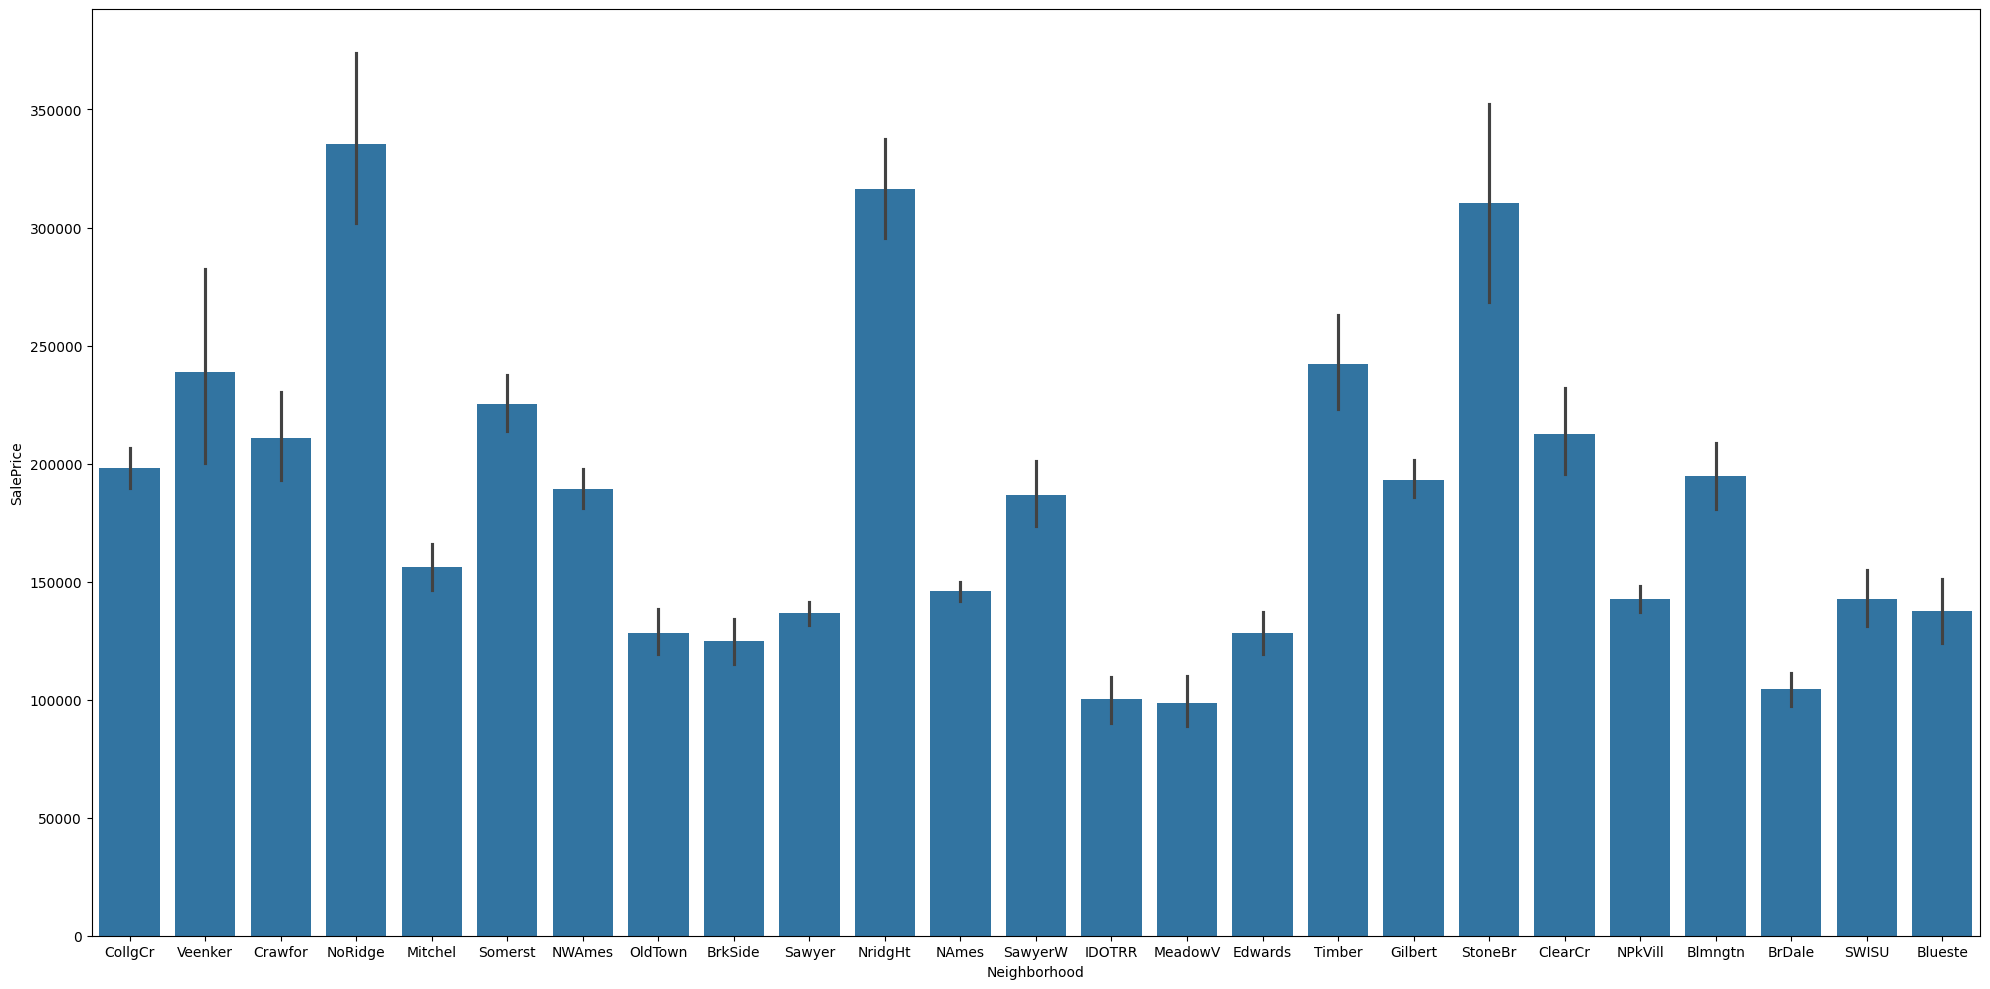

In [54]:
# Check avg sale by neighborhood

plt.figure(figsize=(20,10))

sns.barplot(x='Neighborhood', y='SalePrice', estimator='mean', data=houses_clean)
plt.tight_layout()

In [55]:
# # Removing "Blueste" neighborhood rows, only two entries


# houses_clean = houses_clean[houses_clean['Neighborhood'] != 'Blueste']

In [56]:
houses_clean['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

## 13 - Condition1

* Proximity to various conditions
* 0 nulls
* Nominal

Data dictionary outlines definitions of each item. Group smaller categories based on similarities -- i.e adjacent to railroad vs not. The north south railroad actually has higher sale price averages than the east west. Instead of combining railroad into one category, will keep them in two categories based on railroad direction. Combined near positive feature and adjacent to positive feature into same category.

In [57]:
houses_clean['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

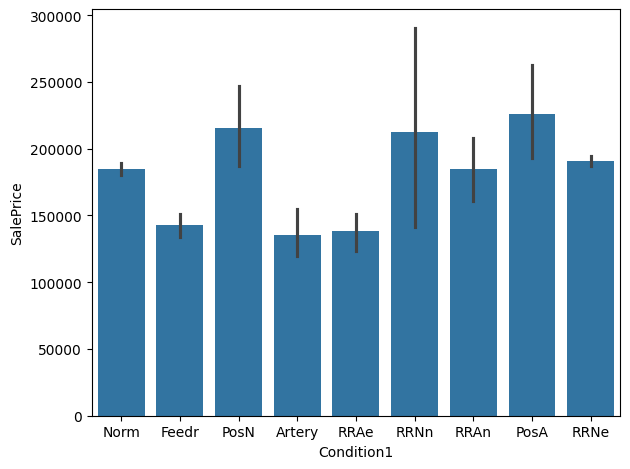

In [58]:
# Check correlations with sales price to see if there is obvious relationship.

sns.barplot(x='Condition1', y='SalePrice', estimator='mean', data=houses_clean)
plt.tight_layout()

In [59]:
# # COnsolidate East West railroad categories into one

# houses_clean['Condition1'] = houses_clean['Condition1'].replace(['RRNe', 'RRAe'], 'RRew')

In [60]:
# # Consolidate North South railroad categories into one

# houses_clean['Condition1'] = houses_clean['Condition1'].replace(['RRNn', 'RRAn'], 'RRns')

In [61]:
# # Consolidate positive off-site categories into one

# houses_clean['Condition1'] = houses_clean['Condition1'].replace('PosA', 'PosN')

In [62]:
# Work check

houses_clean['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

## 14 - Condition2

* Proximity to various conditions (if more than one is present)
* 0 nulls
* Nominal


In [63]:
houses_clean['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [64]:
# sns.barplot(x='Condition2', y='SalePrice', estimator='mean', data=houses_clean)
# plt.tight_layout()

In [65]:
# houses_clean['Condition2'] = houses_clean['Condition2'].apply(lambda x: 'NorNo' if x != 'Norm' else x)

In [66]:
# Work Check

houses_clean['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

## 15 - BldgType


* Type of dwelling
* 0 nulls
* Nominal
* No updates made to data

In [67]:
houses_clean['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

## 16 - HouseStyle



* Style of dwelling
* 0 nulls
* Nominal

In [68]:
houses_clean['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [69]:
# # Average sale price per style

# sns.barplot(x='HouseStyle', y='SalePrice', estimator='mean', data=houses_clean)
# plt.tight_layout()

In [70]:
# houses_clean['HouseStyle'] = houses_clean['HouseStyle'].replace(['2.5Fin', '2.5Unf'], '2.5st')

In [71]:
# Work check

houses_clean['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

## 17 - OverallQual

* Rates the overall material and finish of the house
* No nulls
* Ordinal

In [72]:
houses_clean['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

<Axes: >

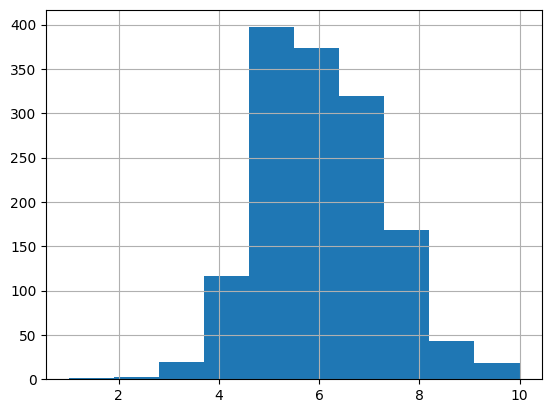

In [73]:
# Look at distribution

houses_clean['OverallQual'].hist()

In [74]:
qual_corr = corr_mat['OverallQual']

qual_corr

LotFrontage      0.251646
LotArea          0.105806
OverallQual      1.000000
OverallCond     -0.091932
YearBuilt        0.572323
YearRemodAdd     0.550684
MasVnrArea       0.411876
BsmtFinSF1       0.239666
BsmtFinSF2      -0.059119
BsmtUnfSF        0.308159
TotalBsmtSF      0.537808
1stFlrSF         0.476224
2ndFlrSF         0.295493
LowQualFinSF    -0.030429
GrLivArea        0.593007
BsmtFullBath     0.111098
BsmtHalfBath    -0.040150
FullBath         0.550600
HalfBath         0.273458
BedroomAbvGr     0.101676
KitchenAbvGr    -0.183882
TotRmsAbvGrd     0.427452
Fireplaces       0.396765
GarageYrBlt      0.547766
GarageCars       0.600671
GarageArea       0.562022
WoodDeckSF       0.238923
OpenPorchSF      0.308819
EnclosedPorch   -0.113937
3SsnPorch        0.030371
ScreenPorch      0.064886
PoolArea         0.065166
MiscVal         -0.031406
MoSold           0.070815
YrSold          -0.027347
SalePrice        0.790982
Name: OverallQual, dtype: float64

In [75]:
# Don't want to eliminate rows for feature highly correlated to target, create bins

# qual_bins = [1, 5, 8, 11]

# qual_labels = ['1-4', '5-7', '8-10']

# houses_clean['BinnedQual'] = pd.cut(houses_clean['OverallQual'], bins = qual_bins, labels = qual_labels, right=False)

In [76]:

houses_clean['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [77]:
# houses_clean['BinnedQual'].value_counts()

## 18 - OverallCond

* Overall condition
* 0 nulls
* Ordinal
* No changes

In [78]:
houses_clean['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [79]:
cond_corr = corr_mat['OverallCond']

cond_corr

LotFrontage     -0.059213
LotArea         -0.005636
OverallQual     -0.091932
OverallCond      1.000000
YearBuilt       -0.375983
YearRemodAdd     0.073741
MasVnrArea      -0.128101
BsmtFinSF1      -0.046231
BsmtFinSF2       0.040229
BsmtUnfSF       -0.136841
TotalBsmtSF     -0.171098
1stFlrSF        -0.144203
2ndFlrSF         0.028942
LowQualFinSF     0.025494
GrLivArea       -0.079686
BsmtFullBath    -0.054942
BsmtHalfBath     0.117821
FullBath        -0.194149
HalfBath        -0.060769
BedroomAbvGr     0.012980
KitchenAbvGr    -0.087001
TotRmsAbvGrd    -0.057583
Fireplaces      -0.023820
GarageYrBlt     -0.324297
GarageCars      -0.185758
GarageArea      -0.151521
WoodDeckSF      -0.003334
OpenPorchSF     -0.032589
EnclosedPorch    0.070356
3SsnPorch        0.025504
ScreenPorch      0.054811
PoolArea        -0.001985
MiscVal          0.068777
MoSold          -0.003511
YrSold           0.043950
SalePrice       -0.077856
Name: OverallCond, dtype: float64

<Axes: >

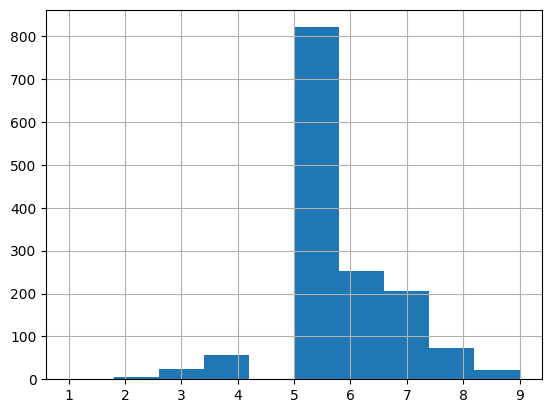

In [80]:
houses_clean['OverallCond'].hist()

In [81]:
# #Bin categories

# cond_bins = [1, 5, 8, 11]

# cond_labels = ['1-4', '5-7', '8-10']

# houses_clean['BinnedCond'] = pd.cut(houses_clean['OverallCond'], bins = cond_bins, labels = cond_labels, right=False)

In [82]:
# houses_clean['BinnedCond'].value_counts()

## 19 - YearBuilt

* Original constrx date
* 0 nulls
* Nominal - Year
* Assigning to buckets due to uneven distribution and relatively strong correlation to sale price

<Axes: >

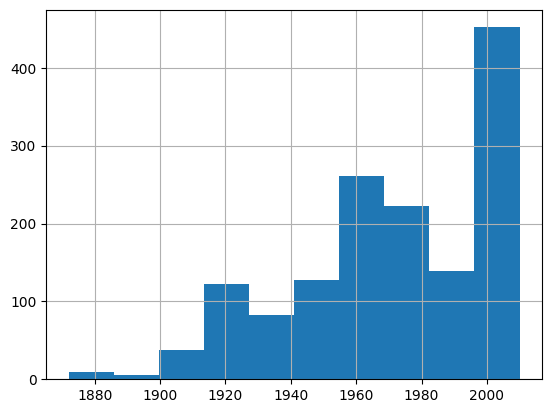

In [83]:
houses_clean['YearBuilt'].hist()

In [84]:
# Look at spread of values

houses_clean['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [85]:
#Function to easily correlate all columns with target column

def corr(df_col):
  col_corr = corr_mat[df_col]
  return col_corr

corr('YearBuilt')

LotFrontage      0.123349
LotArea          0.014228
OverallQual      0.572323
OverallCond     -0.375983
YearBuilt        1.000000
YearRemodAdd     0.592855
MasVnrArea       0.315707
BsmtFinSF1       0.249503
BsmtFinSF2      -0.049107
BsmtUnfSF        0.149040
TotalBsmtSF      0.391452
1stFlrSF         0.281986
2ndFlrSF         0.010308
LowQualFinSF    -0.183784
GrLivArea        0.199010
BsmtFullBath     0.187599
BsmtHalfBath    -0.038162
FullBath         0.468271
HalfBath         0.242656
BedroomAbvGr    -0.070651
KitchenAbvGr    -0.174800
TotRmsAbvGrd     0.095589
Fireplaces       0.147716
GarageYrBlt      0.825667
GarageCars       0.537850
GarageArea       0.478954
WoodDeckSF       0.224880
OpenPorchSF      0.188686
EnclosedPorch   -0.387268
3SsnPorch        0.031355
ScreenPorch     -0.050364
PoolArea         0.004950
MiscVal         -0.034383
MoSold           0.012398
YrSold          -0.013618
SalePrice        0.522897
Name: YearBuilt, dtype: float64

In [86]:
# built_bins = [1, 1900, 1920, 1940, 1960, 1980, 2000, 2050]

# built_labels = ['Pre-1900', '1900 - 1919', '1920 - 1939', '1940 - 1959', '1960 - 1979', '1980 - 1999', '2000 and later']

# houses_clean['BinnedBuilt'] = pd.cut(houses_clean['YearBuilt'], bins = built_bins, labels = built_labels, right=False)

In [87]:
# houses_clean['BinnedBuilt'].value_counts()

In [88]:
# # Work check

# ((houses_clean['YearBuilt'] <= 1939) & (houses_clean['YearBuilt']>= 1920)).sum()

## 20 - YearRemodAdd



### Remodel date -- if never remodel then constrx date -- no nulls -- nominal -- will make a new column with buckets

In [89]:
houses_clean['YearRemodAdd'].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: count, Length: 61, dtype: int64

In [90]:
houses_clean['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [91]:
# remod_bins = [1, 1900, 1920, 1940, 1960, 1980, 2000, 2050]

# remod_labels = ['Pre-1900', '1900 - 1919', '1920 - 1939', '1940 - 1959', '1960 - 1979', '1980 - 1999', '2000 and later']

# houses_clean['BinnedRemod'] = pd.cut(houses_clean['YearRemodAdd'], bins = remod_bins, labels = remod_labels, right=False)

In [92]:
# houses_clean['BinnedRemod'].value_counts()

## 21 - RoofStyle

* Type of roof
* 0 nulls
* nominal

In [93]:
houses_clean['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

## 22 - RoofMatl

* Roof material
* 0 nulls
* Nominal

In [94]:
houses_clean['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

## 23 - Exterior1st



### Exterior house covering -- one null -- nominal

In [95]:
houses_clean['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

## 24 - Exterior2nd



### If more than one, second exterior covering -- one null -- nominal

In [96]:
houses_clean['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

## 25 - MasVnrType

* Masonry veneer type
* 872 nulls
* Nominal

Column was missing more than 50% values, however, data dictionary shows that there is a "None" option if a house has no masonry. Checked against Masonry Area column below, found that all but 8 NaNs in type showed a 0 value in area. Masonry area is one of the columns more highly correlated to sale price so using type columns in order to impute values in area column if possible. Making assumption that all but those 5 are actually none type and updated accordingly. Dropped the rows where area shows greater than 0 with no type listed as some showed 1 sqft for area and across the board those 5 rows look to be error either in area or type column. 

In [231]:
houses_clean['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        867
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [97]:
# Missing Values

houses_clean['MasVnrType'].isna().sum()

np.int64(872)

In [98]:
# What % is missing?

houses_clean['MasVnrType'].isna().sum() / houses_clean.shape[0] * 100

np.float64(59.726027397260275)

In [99]:
#Want to check how masonry area and type look next to each other, NA for masonry type is actually a value for no masonry

mason_check = houses_clean[houses_clean['MasVnrType'].isna()]
mason_check

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [100]:
# Values in masonry area next to NA masonry type are incorrect and unable to impute on either side, remove these rows

mason_to_drop = mason_check[mason_check['MasVnrArea'] > 0]


# houses_clean.iloc[mason_to_drop]
# houses_clean.iloc[mason_to_drop]

mason_to_drop

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
625,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
774,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
1301,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1335,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000


In [101]:
# Drop values above

houses_clean = houses_clean[~((houses_clean['MasVnrType'].isna()) & (houses_clean['MasVnrArea'] > 0))]

In [102]:
# Work check

houses_clean[((houses_clean['MasVnrType'].isna()) & (houses_clean['MasVnrArea'] > 0))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [103]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1455 non-null   object 
 7   LandContour    1455 non-null   object 
 8   Utilities      1455 non-null   object 
 9   LotConfig      1455 non-null   object 
 10  LandSlope      1455 non-null   object 
 11  Neighborhood   1455 non-null   object 
 12  Condition1     1455 non-null   object 
 13  Condition2     1455 non-null   object 
 14  BldgType       1455 non-null   object 
 15  HouseStyle     1455 non-null   object 
 16  OverallQual    1455 non-null   int64  
 17  OverallCond    1455 non-null   int64  
 18  YearBuilt    

In [104]:
# Per data dictionary, NaN is no masonry value, mismatches dropped above. Change NaNs to string 'none'

# houses_clean["MasVnrType"] = houses_clean["MasVnrType"].replace(np.nan, 'None')

In [105]:
houses_clean['MasVnrType'].isna().sum()

np.int64(867)

## 26	- MasVnrArea

* Masonry veneer area
* 8 nulls
* Numeric

Used Masonry Type column above to handle naans in this column. 8 columns had "none" type listed with area in the area column. One of the two is in error. Decided to drop these 8 rows as there was no way to tell where error was. Some had only 1 sqft of masonry listed, some had no masonry type with a large area,  best to just drop them since missing looks to be in error

All other naans had none type listed which we can impute to 0 masonry area

In [106]:
houses_clean['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
16.0       7
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 326, dtype: int64

In [107]:
# Check nulls

houses_clean[houses_clean['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [108]:
# Update nulls to 0 as these are only masonry type none -- aka no masonry

# houses_clean['MasVnrArea'] = houses_clean['MasVnrArea'].replace(np.nan, 0)

In [109]:
# Work check

houses_clean[houses_clean['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


## 27	ExterQual

### Evaluates the quality of the material on the exterior  -- no nulls -- ordinal

In [110]:
houses_clean['ExterQual'].value_counts()

ExterQual
TA    902
Gd    487
Ex     52
Fa     14
Name: count, dtype: int64

## 28	ExterCond

###  Evaluates the present condition of the material on the exterior -- no nulls -- ordinal

In [111]:
houses_clean['ExterCond'].value_counts()

ExterCond
TA    1277
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

## 29	Foundation
### Type of foundation -- no nulls -- nominal

In [112]:
houses_clean['ExterCond'].value_counts()

ExterCond
TA    1277
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

## 30	BsmtQual

* Evaluates the height of the basement
* 37 nulls
* Nominal

All NaaNs also have NaaNs or 0 across the board on all basement related questions. Now assuming this means no basement. Changing these values to "NA" -- per data dictionary this is no basement

In [113]:
houses_clean['BsmtQual'].value_counts()

BsmtQual
TA    646
Gd    616
Ex    121
Fa     35
Name: count, dtype: int64

In [114]:
houses_clean['BsmtQual'].isna().sum()

np.int64(37)

In [115]:
houses_clean[houses_clean['BsmtQual'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


## 31	BsmtCond

* Evaluates the general condition of the basement
* 37 nulls
* Nominal

All NaaNs also have NaaNs or 0 across the board on all basement related questions. Now assuming this means no basement. Changing these values to "NA" -- per data dictionary this is no basement

In [116]:
houses_clean['BsmtCond'].isna().sum()

np.int64(37)

In [117]:
houses_clean['BsmtCond'].value_counts()

BsmtCond
TA    1306
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

## 32	BsmtExposure

* Refers to walkout or garden level walls
* 38 nulls
* Nominal

One more NaaN in this column than in other basement columns. There is one that does have a basement with square footage (basement is unfinished) but nothing in the exposure column. Most common exposure type is "no" and most common for Unfisished type is also "no" will impute with No

In [118]:
houses_clean['BsmtExposure'].value_counts()

BsmtExposure
No    948
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [119]:
houses_clean['BsmtExposure'].isna().sum()

np.int64(38)

In [120]:
houses_clean[houses_clean['BsmtExposure'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


In [121]:
# Check what exposure types Unfinished basement types have

houses_clean[houses_clean['BsmtFinType1'] == 'Unf']['BsmtExposure'].value_counts()


BsmtExposure
No    345
Av     46
Mn     27
Gd     11
Name: count, dtype: int64

In [122]:
houses_clean.loc[(houses_clean['BsmtFinType1'] == 'Unf') & (houses_clean['BsmtExposure'].isna()), 'BsmtExposure'] = 'Unf'


In [123]:
houses_clean['BsmtExposure'].isnull().sum()

np.int64(37)

In [124]:
houses_clean[houses_clean['BsmtExposure'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


## 33	BsmtFinType1

* BsmtFinType1
* 37 nulls
* Nominal

All NaaNs also have NaaNs or 0 across the board on all basement related questions. Now assuming this means no basement. Changing these values to "NA" -- per data dictionary this is no basement

In [125]:
houses_clean['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    416
ALQ    220
BLQ    148
Rec    131
LwQ     73
Name: count, dtype: int64

In [126]:
houses_clean['BsmtFinType1'].isna().sum()

np.int64(37)

## 34	-	BsmtFinSF1

* Type 1 finished square feet 0 
* 0 null
* numeric

<Axes: >

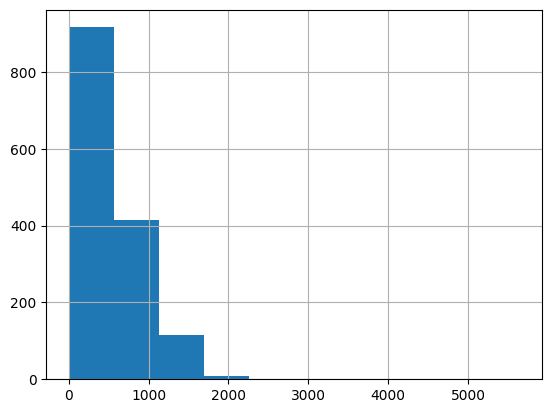

In [127]:
houses_clean['BsmtFinSF1'].hist()

In [128]:
houses_clean['BsmtFinSF1'].isnull().sum()

np.int64(0)

## 35	-	BsmtFinType2

* Type 2 finished square feet
* 42 nulls
* Ordinal

One column was missing, imputed value to Unf using most common occurence with other columns. Remaining naans will be imputed to NA no basement in preprocess


In [129]:
houses_clean['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1252
Rec      53
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [130]:
houses_clean['BsmtFinType2'].isna().sum()

np.int64(38)

In [131]:
# Nan Check, one is missing a single value in BsmtFin2

houses_clean[houses_clean['BsmtFinType2'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500


In [194]:
# What are typical responses fopr Fin2 when Fin 1 = GLQ

houses_clean[houses_clean['BsmtFinType1'] == 'GLQ']['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    391
LwQ     10
Rec      8
ALQ      4
BLQ      2
Name: count, dtype: int64

In [133]:
houses_clean[houses_clean['BsmtFinSF2'] > 0]['BsmtFinType2'].value_counts()

BsmtFinType2
Rec    53
LwQ    46
BLQ    33
ALQ    19
GLQ    14
Name: count, dtype: int64

In [196]:
# Impute missing value to Unf

houses_clean.loc[(houses_clean['BsmtFinType1'] == 'GLQ') & (houses_clean['BsmtFinType2'].isna()), 'BsmtFinType2'] = 'Unf'

In [198]:
# Check that 37 nulls exist

houses_clean['BsmtFinType2'].isna().sum()

np.int64(37)

## 36	-	BsmtFinSF2

### Type 2 finished square feet -- 1 null	Numeric


<Axes: >

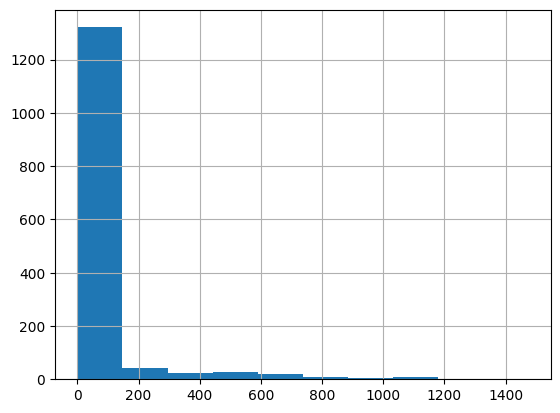

In [134]:
houses_clean['BsmtFinSF2'].hist()

## 37	-	BsmtUnfSF

### Unfinished square feet of basement area -- 1 null	Numeric

<Axes: >

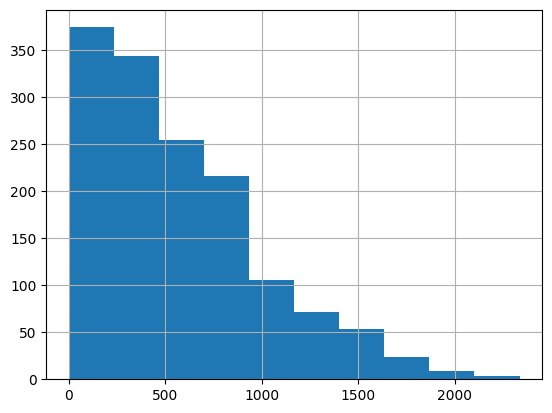

In [135]:
houses_clean['BsmtUnfSF'].hist()

## 38	-	TotalBsmtSF

* Total square feet of basement area
* 0 null
* Numeric

Four numbers fell outside 4 std dev from mean, removed those

<Axes: >

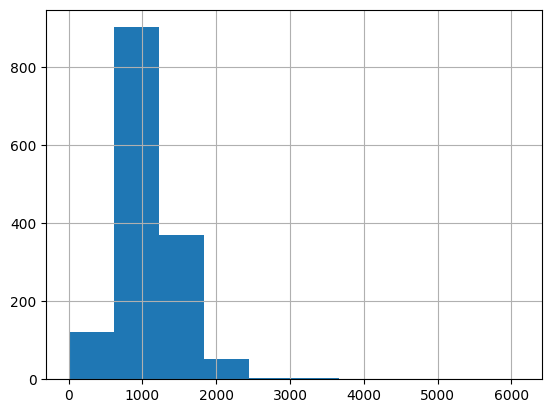

In [136]:
houses_clean['TotalBsmtSF'].hist()

In [137]:
(houses_clean['TotalBsmtSF'] > 2500).sum()

np.int64(7)

In [138]:
houses_clean['TotalBsmtSF'].describe()

count    1455.000000
mean     1057.800000
std       439.215376
min         0.000000
25%       796.000000
50%       992.000000
75%      1298.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [139]:
def outliers(df_col):
  mean_calc = houses_clean[df_col].mean()
  st_dev_calc = houses_clean[df_col].std()
  outlier_calc = (houses_clean[df_col] - mean_calc).abs() >= 4 * st_dev_calc
  return outlier_calc


In [140]:
# # Check for outliers

# total_bsmt_mean = houses_clean['TotalBsmtSF'].mean()
# total_bsmt_sd = houses_clean['TotalBsmtSF'].std()

# bsmt_out_calc = (houses_clean['TotalBsmtSF'] - total_bsmt_mean).abs() >= 4 * total_bsmt_sd

# bsmt_outliers = houses_clean[bsmt_out_calc]

# bsmt_outliers

In [141]:
# houses_clean = houses_clean[~bsmt_out_calc]

In [142]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1455 non-null   object 
 7   LandContour    1455 non-null   object 
 8   Utilities      1455 non-null   object 
 9   LotConfig      1455 non-null   object 
 10  LandSlope      1455 non-null   object 
 11  Neighborhood   1455 non-null   object 
 12  Condition1     1455 non-null   object 
 13  Condition2     1455 non-null   object 
 14  BldgType       1455 non-null   object 
 15  HouseStyle     1455 non-null   object 
 16  OverallQual    1455 non-null   int64  
 17  OverallCond    1455 non-null   int64  
 18  YearBuilt    

## 39	-	Heating

### Type of heating --	0	null Nominal

In [143]:
houses_clean['Heating'].value_counts()

Heating
GasA     1423
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

## 40	-	HeatingQC

### Heating quality and condition --	0 null Ordinal


In [144]:
houses_clean['HeatingQC'].value_counts()

HeatingQC
Ex    738
TA    427
Gd    240
Fa     49
Po      1
Name: count, dtype: int64

## 41	-	CentralAir

### Central air conditioning --	0 null --	Binary Nominal - Yes/No


In [145]:
houses_clean['CentralAir'].value_counts()

CentralAir
Y    1360
N      95
Name: count, dtype: int64

## 42	-	Electrical

### Electrical system -- 0 null	Nominal


In [146]:
houses_clean['Electrical'].value_counts()

Electrical
SBrkr    1330
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [199]:
houses_clean[houses_clean['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


## 43	-	1stFlrSF

* First Floor square feet
* 0 nulls
* Numeric

<Axes: >

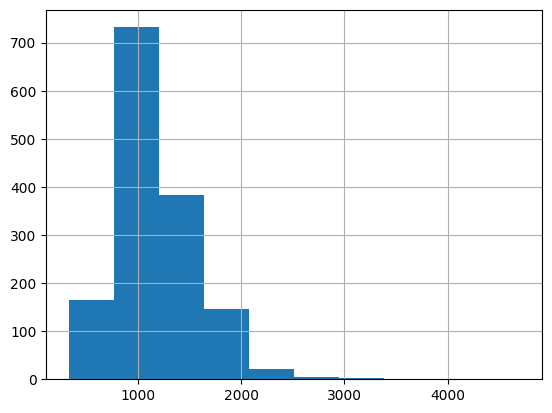

In [147]:
houses_clean['1stFlrSF'].hist()

In [148]:
houses_clean['1stFlrSF'].describe()

count    1455.000000
mean     1163.147766
std       386.978085
min       334.000000
25%       882.000000
50%      1088.000000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [149]:
# outliers_1stFlrSF = outliers('1stFlrSF')

# houses_clean = houses_clean[~outliers_1stFlrSF]


In [150]:
houses_clean['1stFlrSF'].describe()

count    1455.000000
mean     1163.147766
std       386.978085
min       334.000000
25%       882.000000
50%      1088.000000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

## 44	-	2ndFlrSF

### Second floor square feet -- 0	null Numeric

<Axes: >

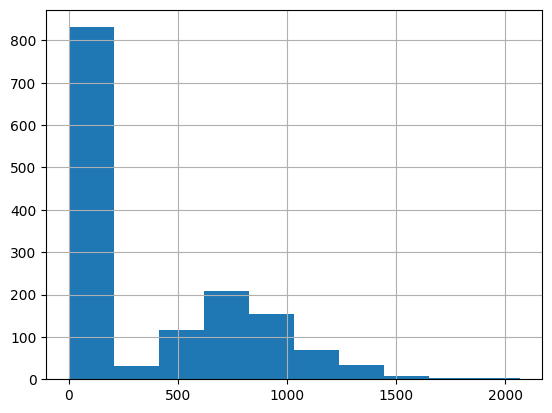

In [151]:
houses_clean['2ndFlrSF'].hist()

## 45	-	LowQualFinSF

### Low quality finished square feet (all floors) -	0	null Numeric

<Axes: >

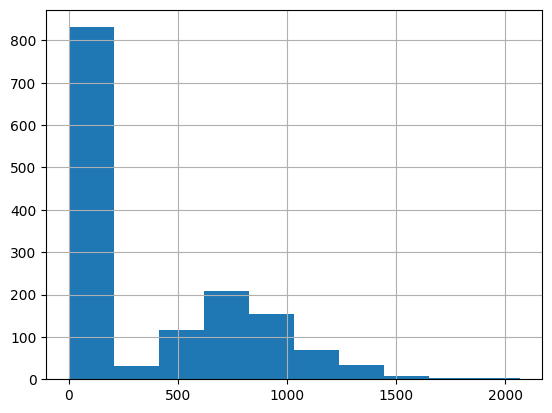

In [152]:
houses_clean['2ndFlrSF'].hist()

## 46	-	GrLivArea

### Above grade (ground) living area square feet - 0 null	Numeric

<Axes: >

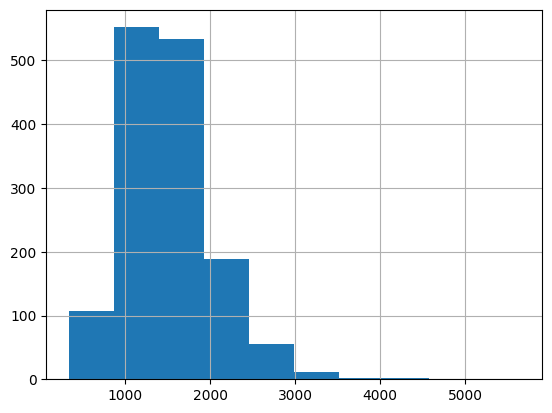

In [153]:
houses_clean['GrLivArea'].hist()

In [154]:
# houses_clean[outliers('GrLivArea')]

# liv_area_outs = outliers('GrLivArea')

# houses_clean = houses_clean[~liv_area_outs]

In [155]:
houses_clean['GrLivArea'].describe()

count    1455.000000
mean     1514.712715
std       525.139364
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1776.000000
max      5642.000000
Name: GrLivArea, dtype: float64

## 47	-	BsmtFullBath

### Basement full bathrooms -- 2 null	Numeric


<Axes: >

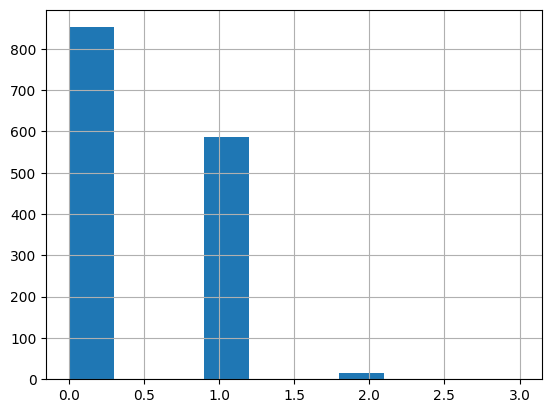

In [156]:
houses_clean['BsmtFullBath'].hist()

## 48	-	BsmtHalfBath

### Basement half bathrooms --	2 nulls	Numeric

<Axes: >

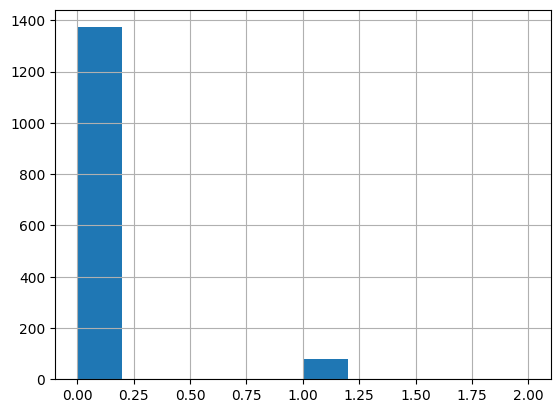

In [157]:
houses_clean['BsmtHalfBath'].hist()

## 49	-	FullBath

### Full bathrooms above grade - 0 nulls	Numeric


<Axes: >

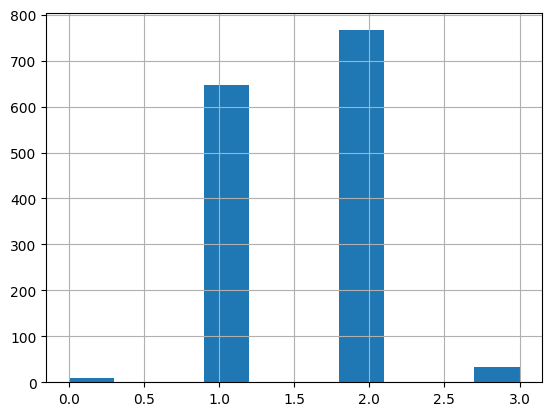

In [158]:
houses_clean['FullBath'].hist()

## 50	-	HalfBath


### Half baths above grade -	0	nulls Numeric


<Axes: >

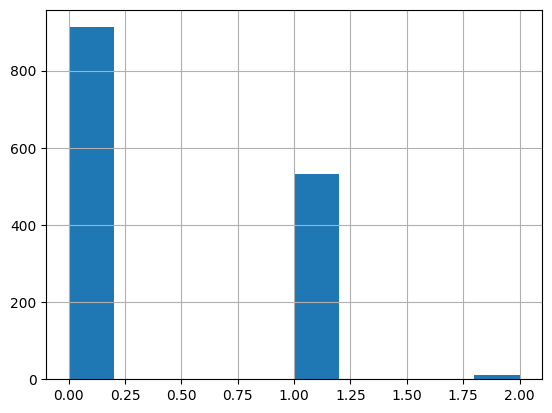

In [159]:
houses_clean['HalfBath'].hist()

## 51	-	BedroomAbvGr


### Bedrooms above grade --	0	nulls Numeric


<Axes: >

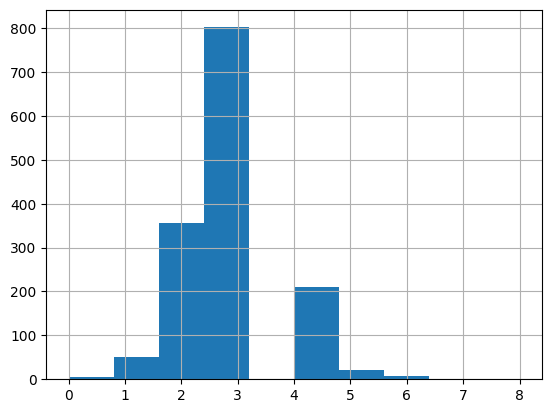

In [160]:
houses_clean['BedroomAbvGr'].hist()

## 52	-	KitchenAbvGr

Kitchens above grade --	0	nulls Numeric


<Axes: >

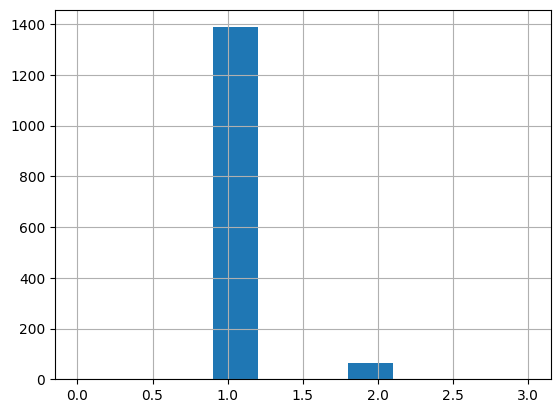

In [161]:
houses_clean['KitchenAbvGr'].hist()

## 53	-	KitchenQual


### Kitchen quality	-- 1	null Ordinal


In [14]:
houses_clean['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

## 54	TotRmsAbvGrd	

### Total rooms above grade (does not include bathrooms) -- 0	nulls Numeric


<Axes: >

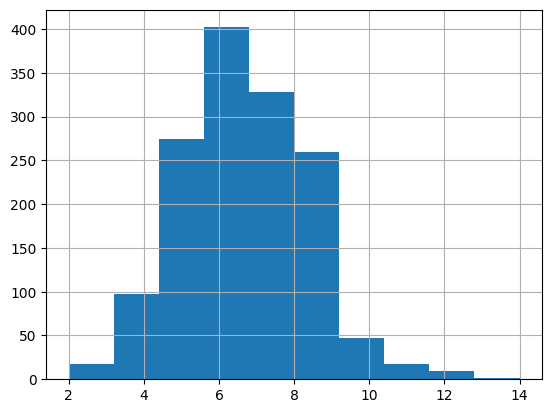

In [163]:
houses_clean['TotRmsAbvGrd'].hist()

## 55	-	Functional

### Home functionality (Assume typical unless deductions are warranted) --	2 nulls	Ordinal


In [164]:
houses_clean['Functional'].value_counts()

Functional
Typ     1357
Min2      33
Min1      30
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

## 56	-	Fireplaces

### Number of fireplaces	-- 0 nulls	Numeric

<Axes: >

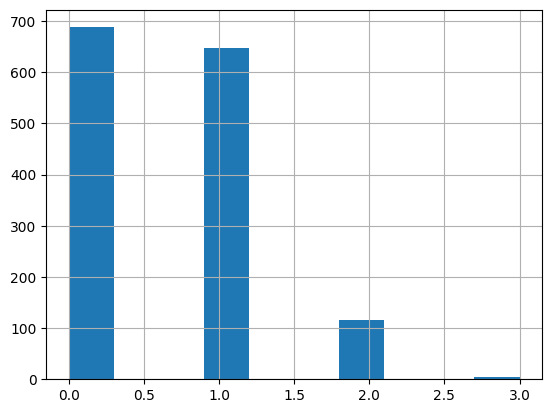

In [165]:
houses_clean['Fireplaces'].hist()

## 57	-	FireplaceQu


* Fireplace quality
* 688 nulls
* Ordinal

All missing values show 0 in fireplace count, no no fireplace exists. Will change to NA no fireplace in preproces

In [204]:
houses_clean['FireplaceQu'].isna().sum()

np.int64(688)

In [166]:
houses_clean['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    310
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [200]:
# Do any Nans have a fireplace count in number of fireplace column?

houses_clean[(houses_clean['Fireplaces'] > 0) & (houses_clean['FireplaceQu'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [202]:
houses_clean[houses_clean['FireplaceQu'].isna()]['Fireplaces'].value_counts()

Fireplaces
0    688
Name: count, dtype: int64

## 58	GarageType

* Garage location
* 81 nulls
* Nominal

All nans are from homes with no garage, need to impute string NA for no garage

In [206]:
houses_clean['GarageType'].isna().sum()

np.int64(81)

In [167]:
houses_clean['GarageType'].value_counts()

GarageType
Attchd     866
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [224]:
houses_clean[(houses_clean['GarageYrBlt'].isna()) & (~houses_clean['GarageType'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 59	GarageYrBlt

### Year garage was built -- 78nulls	Numeric - Year


<Axes: >

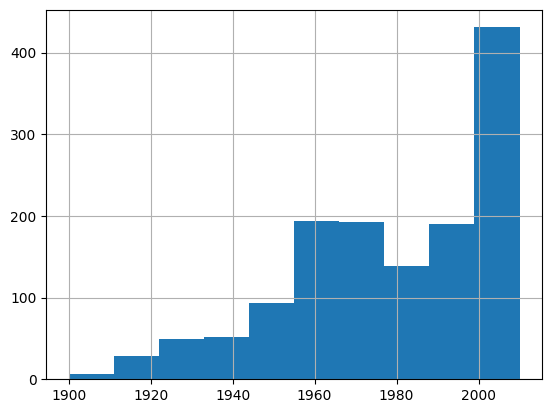

In [168]:
houses_clean['GarageYrBlt'].hist()

In [226]:
houses_clean['GarageYrBlt'].nunique()

97

## 60	GarageFinish

### Interior finish of the garage -- 78 nulls	Nominal


In [169]:
houses_clean['GarageFinish'].value_counts()

GarageFinish
Unf    604
RFn    419
Fin    351
Name: count, dtype: int64

## 61	GarageCars

### Size of garage in car capacity -- 1null 	Numeric


<Axes: >

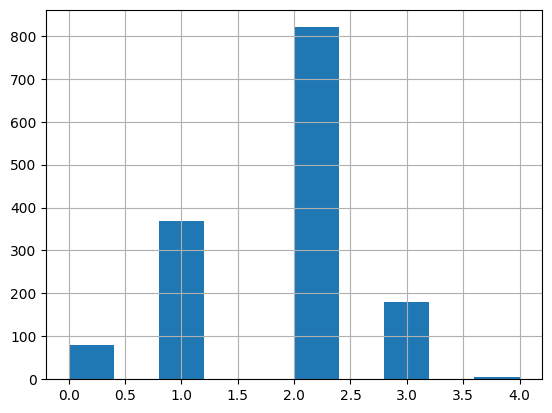

In [170]:
houses_clean['GarageCars'].hist()

## 62	GarageArea

###  Size of garage in square feet -- 1 null	Numeric


<Axes: >

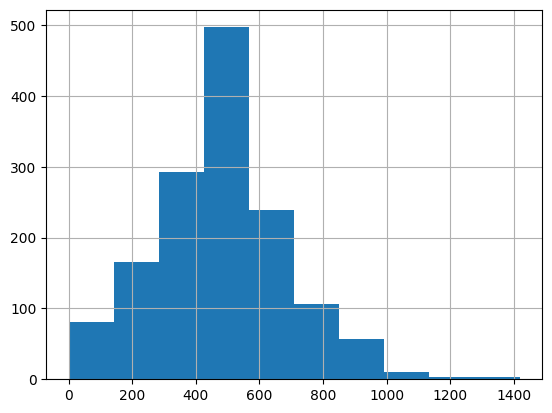

In [171]:
houses_clean['GarageArea'].hist()

## 63	GarageQual

### Garage quality -- 78 nulls	Ordinal


In [172]:
houses_clean['GarageQual'].value_counts()

GarageQual
TA    1306
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

## 64	GarageCond

### Garage condition -- 78 nulls	Ordinal


In [173]:
houses_clean['GarageCond'].value_counts()

GarageCond
TA    1321
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

## 65	PavedDrive

### Paved driveway - 0	nulls Nominal


In [174]:
houses_clean['PavedDrive'].value_counts()

PavedDrive
Y    1336
N      89
P      30
Name: count, dtype: int64

## 66	WoodDeckSF

### Wood deck area in square feet - 0 nulls	Numeric


<Axes: >

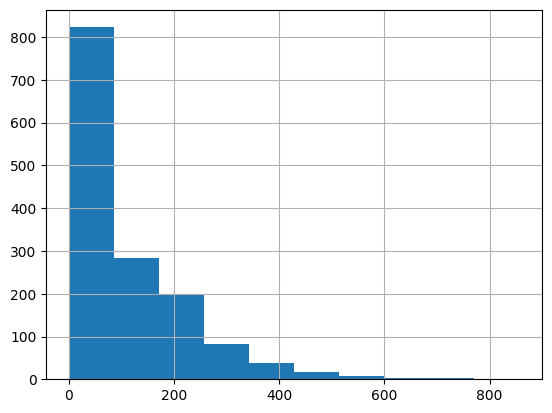

In [175]:
houses_clean['WoodDeckSF'].hist()

## 67	OpenPorchSF

### Open porch area in square feet --	0 nulls	Numeric


<Axes: >

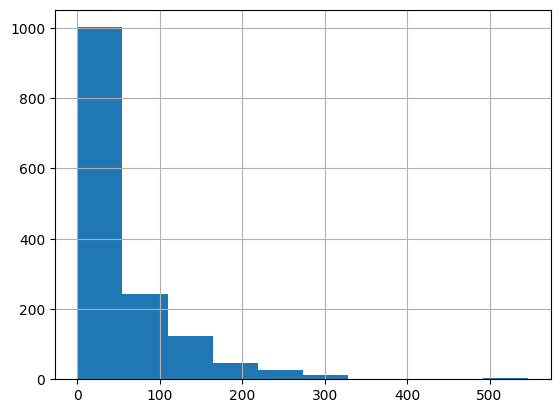

In [176]:
houses_clean['OpenPorchSF'].hist()

## 68	EnclosedPorch

### Enclosed porch area in square feet -  0	nulls Numeric


<Axes: >

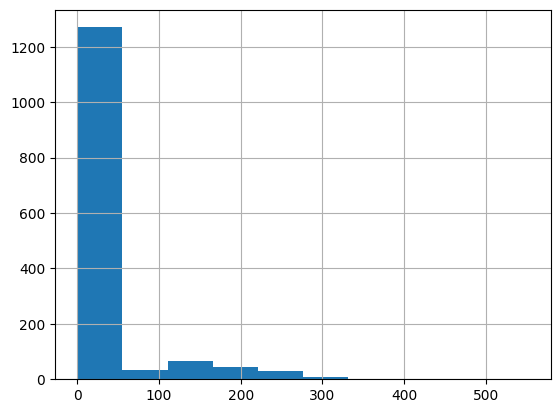

In [177]:
houses_clean['EnclosedPorch'].hist()

## 69	3SsnPorch

### Three season porch area in square feet - 0	nulls Numeric


<Axes: >

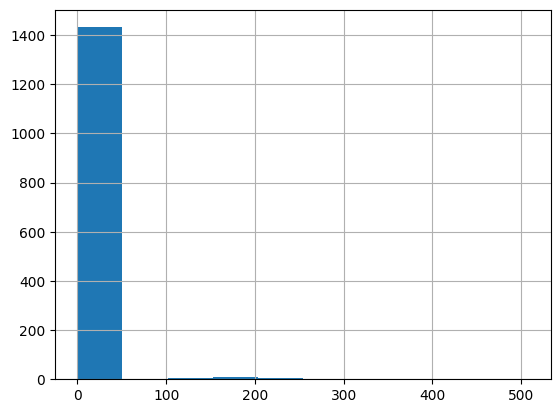

In [178]:
houses_clean['3SsnPorch'].hist()

## 70	ScreenPorch

### Screen porch area in square feet - 0 nulls	Numeric


<Axes: >

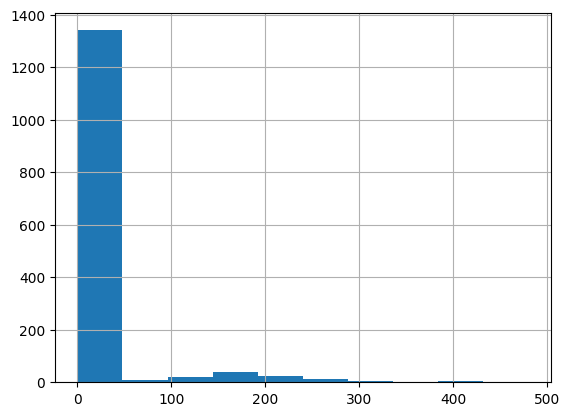

In [179]:
houses_clean['ScreenPorch'].hist()

## 71	PoolArea

### Screen porch area in square feet - 0 nulls	Numeric


<Axes: >

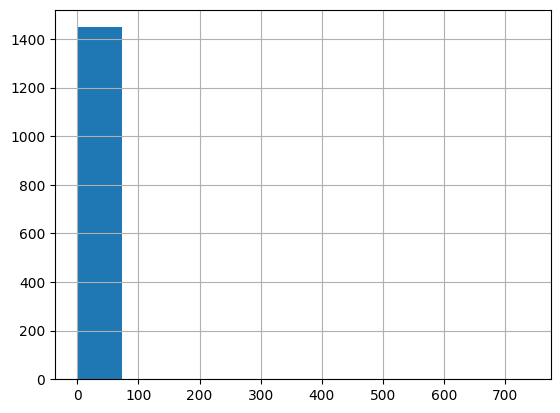

In [180]:
houses_clean['PoolArea'].hist()

## 72	PoolQC

* Pool quality
* 1448 nulls
* Ordinal

Missing values are for homes with no pool, impute to NA for no pool


In [221]:
houses_clean['PoolQC'].isnull().sum()

np.int64(1448)

In [218]:
houses_clean['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [219]:
# Check if any rows with area in pool area have NA for quality

houses_clean[(houses_clean['PoolQC'].isna()) & (houses_clean['PoolArea'] > 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 73	Fence

* Fence quality
* 1169 nulls
* Nominal

Impute missing values to NA no fence


In [182]:
houses_clean['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

## 74	MiscFeature

* Miscellaneous feature not covered in other categories
* 1408 nulls
* Nominal

Impute values to NA for none misc feature

In [183]:
houses_clean['MiscFeature'].value_counts()

MiscFeature
Shed    49
Othr     2
Gar2     1
TenC     1
Name: count, dtype: int64

## 75	MiscVal

### $Value of miscellaneous feature -- 0 nulls	Numeric


<Axes: >

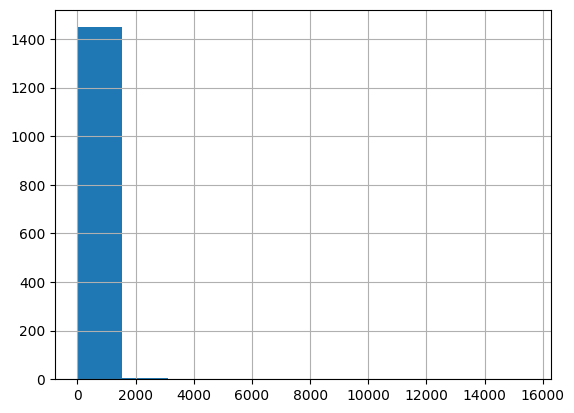

In [184]:
houses_clean['MiscVal'].hist()

## 76	MoSold

### Month Sold (MM) -- 0 nulls	Numeric


<Axes: >

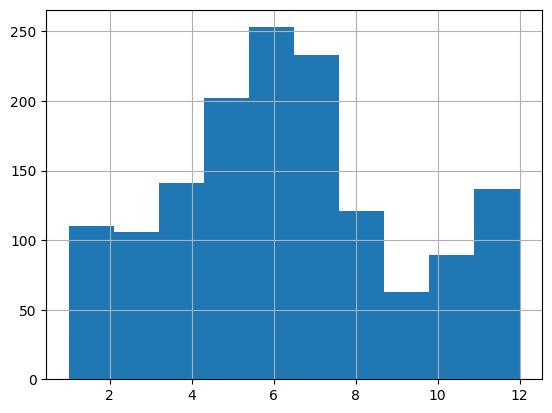

In [185]:
houses_clean['MoSold'].hist()

## 77	YrSold

### Year Sold (YYYY) -- 0 nulls	Numeric


In [186]:
houses_clean['YrSold'].value_counts()

YrSold
2009    336
2007    327
2006    313
2008    304
2010    175
Name: count, dtype: int64

<Axes: >

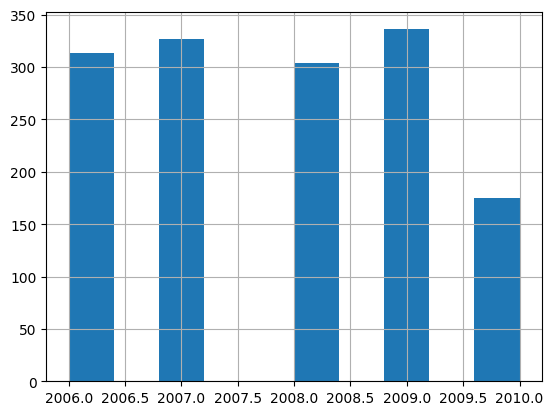

In [187]:
houses_clean['YrSold'].hist()

## 78	SaleType

### Type of sale - 1 null	Nominal


In [188]:
houses_clean['SaleType'].value_counts()

SaleType
WD       1263
New       122
COD        42
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

## 79	SaleCondition

### Condition of sale - 0 nulls	Nominal


In [189]:
houses_clean['SaleCondition'].value_counts()

SaleCondition
Normal     1193
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

## 80 Sale Price

### Sale price -- 0 nulls, numeric


<Axes: >

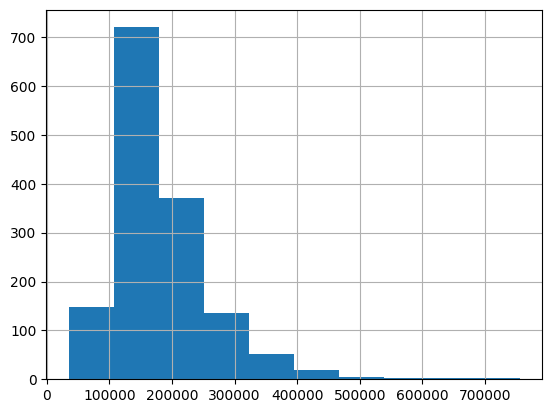

In [190]:
houses_clean['SalePrice'].hist()

In [191]:
corr('SalePrice').sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [222]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1455 non-null   object 
 7   LandContour    1455 non-null   object 
 8   Utilities      1455 non-null   object 
 9   LotConfig      1455 non-null   object 
 10  LandSlope      1455 non-null   object 
 11  Neighborhood   1455 non-null   object 
 12  Condition1     1455 non-null   object 
 13  Condition2     1455 non-null   object 
 14  BldgType       1455 non-null   object 
 15  HouseStyle     1455 non-null   object 
 16  OverallQual    1455 non-null   int64  
 17  OverallCond    1455 non-null   int64  
 18  YearBuilt    

In [229]:
houses_clean.to_csv('train2.csv')

In [228]:
houses_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
